# IS597MLC Final Assignment

### Student Name: Anna Hartman
### Net ID: annalh4

# Install and Load Libraries

In [1]:
!pip install imblearn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 

# Dataset

The dataset utilized in this notebook is a 22.74 MB file with 253,680 instances and 22 column attributes. This uncleaned data is sourced from the CDC’s Behavioral Risk Factor Surveillance System (BRFSS) from 2015 which covers all 50 United States, Puerto Rico, the US Virgin Islands, and Guam. It includes attributes such as age, sex, high blood pressure condiiton, and physical activity among other health metrics. The target class of this notebook will be "Diabetes_012" which includes (3) values: (0) - no Diabetes, (1) - pre-Diabetes, and (2) - Diabetic. The dataset is located on Kaggle.com at https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_012_health_indicators_BRFSS2015.csv.  

Attributes:

* Diabetes_012
* HighBP
* HighChol
* CholCheck
* BMI
* Smoker
* Stroke
* HeartDiseaseorAttack
* PhysActivity
* Fruits
* Veggies
* HvyAlcoholConsump
* AnyHealthcare
* NoDocbcCost
* Genhlth
* Menthlth
* Physhlth
* DiffWalk
* Sex
* Age
* Education
* Incomes


# Load Data


************** Checking Rows and Columns ************

No of Rows: 253680
No of Columns: 22

<Data View: First Five Instances>

************** Checking Attribute Datatypes ************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump    

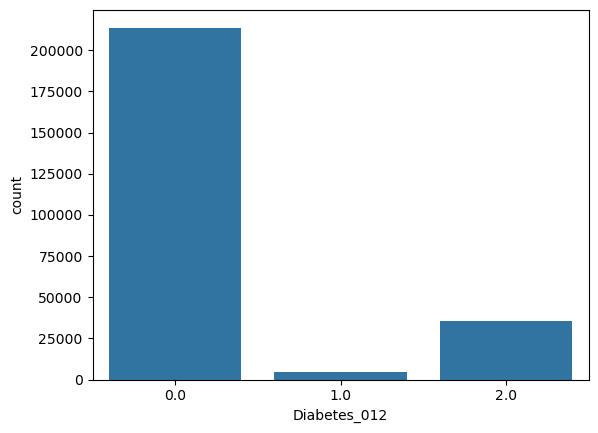

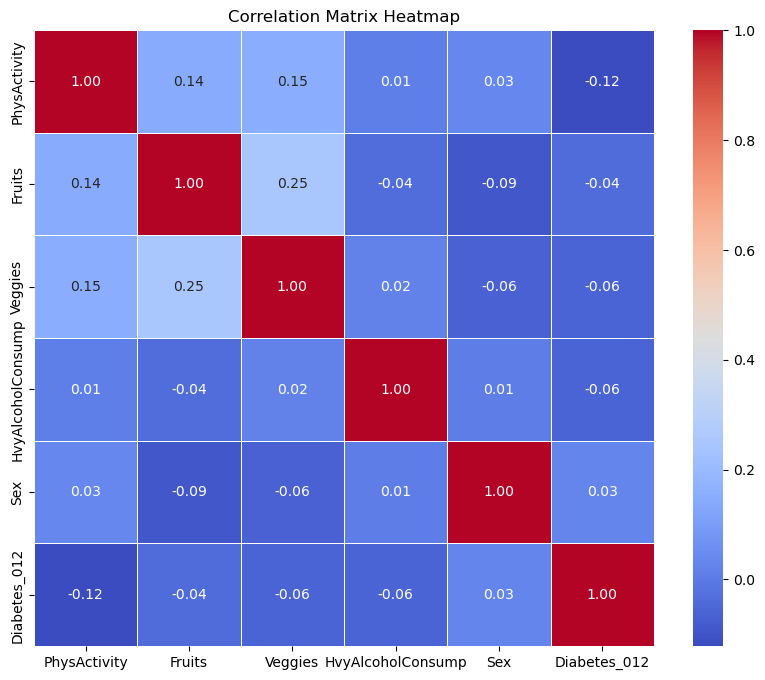

In [3]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", sep=",", encoding="utf-8")

# check how many rows and columns
print("\n************** Checking Rows and Columns ************\n")
print("No of Rows:", len(df))
print("No of Columns:", len(df.columns))

# display the first 5 instances of the data
print("\n<Data View: First Five Instances>")
df.head(5)

# display data attributes to include null values
print("\n************** Checking Attribute Datatypes ************\n")
df.info()

# get rid of any null values
print("\n************** Dropping Null Values ************\n")
df.dropna()

# get rid of duplicates keeping the first instance
print("\n************** Dropping Duplicates ************\n")
df.drop_duplicates(keep='first')

# analyze column attributes numerically
print("\n************** Displaying count, mean, min, and max for each attribute ************\n")
df.describe().round(4)

# ensure target data is binary
print("\n************** Counts Per Target Value ************\n")
print(df['Diabetes_012'].value_counts())
sns.countplot(x="Diabetes_012", data=df)

# transform target data to make it binary; merge prediabetic and diabetic data into single value
df["Diabetes_012"] = df["Diabetes_012"].apply(lambda x: 0 if x == 0 else 1)

# verify target data was transformed
print("\n************** Counts Per Target Value ************\n")
print(df['Diabetes_012'].value_counts())

# choose data to preprocess
df = df[['PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'Diabetes_012']]

# visualize selected dataframe using a heatmap
plt.figure(figsize=(10,8))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Train and Test Split

In [4]:
# split data into X and y
X = df.drop('Diabetes_012',axis=1)
y = df['Diabetes_012']

# apply train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.33, random_state=42, stratify=y_test)

# check the data post-split
print("\n************** Data After Splitting **************\n")

print("Train Data: {}".format(X_train.shape))
print("Val Data: {}".format(X_val.shape))
print("Test Data: {}".format(X_test.shape))
print("\n")

print("\n\n************** Class Label Distribution **************")

print("\nClass Counts(label, row): Train")
print(y_train.value_counts())
print("\nClass Counts(label, row): Validation")
print(y_val.value_counts())
print("\nClass Counts(label, row): Test")
print(y_test.value_counts())

# balance the data using SMOTE method was used initially, but yielded a lower AUC score
# the code has been left as a comment to provide background on what was used intially
#smote = SMOTE()
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# balance data using RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# re-check the data after balancing
print("\n************** Data After Balancing **************\n")

print("Train Data: {}".format(X_train_resampled.shape))
print("Val Data: {}".format(X_val.shape))
print("Test Data: {}".format(X_test.shape))
print("\n")

print("\n\n************** Class Label Distribution After Balancing **************")

print("\nClass Counts(label, row): Train")
print(y_train_resampled.value_counts())
print("\nClass Counts(label, row): Validation")
print(y_val.value_counts())
print("\nClass Counts(label, row): Test")
print(y_test.value_counts())

# scale the data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train_resampled)
scaled_X_test = scaler.transform(X_test)


************** Data After Splitting **************

Train Data: (169965, 5)
Val Data: (56089, 5)
Test Data: (27626, 5)




************** Class Label Distribution **************

Class Counts(label, row): Train
Diabetes_012
0    143181
1     26784
Name: count, dtype: int64

Class Counts(label, row): Validation
Diabetes_012
0    47250
1     8839
Name: count, dtype: int64

Class Counts(label, row): Test
Diabetes_012
0    23272
1     4354
Name: count, dtype: int64

************** Data After Balancing **************

Train Data: (53568, 5)
Val Data: (56089, 5)
Test Data: (27626, 5)




************** Class Label Distribution After Balancing **************

Class Counts(label, row): Train
Diabetes_012
0    26784
1    26784
Name: count, dtype: int64

Class Counts(label, row): Validation
Diabetes_012
0    47250
1     8839
Name: count, dtype: int64

Class Counts(label, row): Test
Diabetes_012
0    23272
1     4354
Name: count, dtype: int64


# Create LR Model and Fit

In [5]:
lr_model = LogisticRegressionCV(cv=10, 
                                random_state=42, 
                                verbose=0)
lr_model.fit(scaled_X_train, y_train_resampled)

LogisticRegressionCV(cv=10, random_state=42)

## Evaluate Model

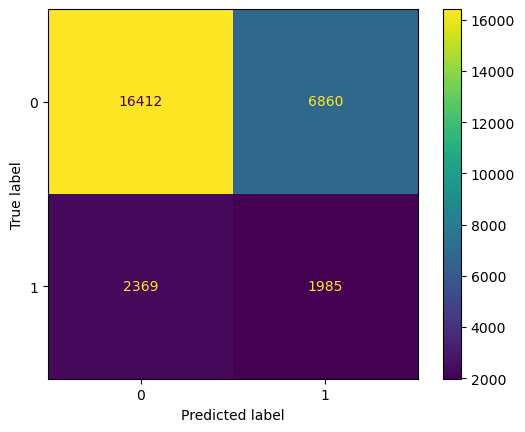

In [6]:
lr_y_pred = lr_model.predict(scaled_X_test)
lr_y_pred

matrix = confusion_matrix(y_test, lr_y_pred)

confusion_display = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                          display_labels=lr_model.classes_)
confusion_display.plot()

plt.show()

In [7]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78     23272
           1       0.22      0.46      0.30      4354

    accuracy                           0.67     27626
   macro avg       0.55      0.58      0.54     27626
weighted avg       0.77      0.67      0.70     27626



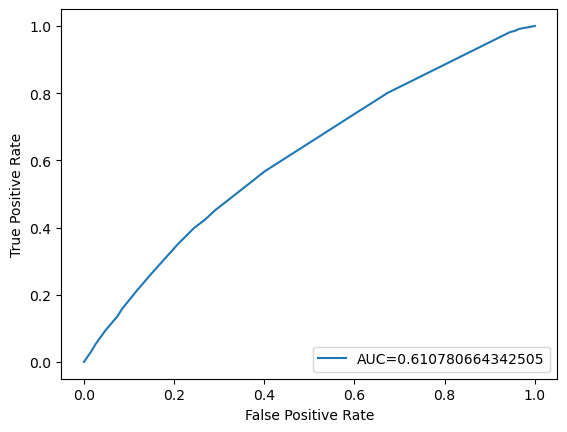

In [8]:
lry_pred_proba = lr_model.predict_proba(scaled_X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  lry_pred_proba)
auc = roc_auc_score(y_test, lry_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Create DT Model and Fit

In [9]:
dt_model = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=2, random_state=42)
dt_model.fit(scaled_X_train, y_train_resampled)

DecisionTreeClassifier(random_state=42)

## Evaluate DT Model

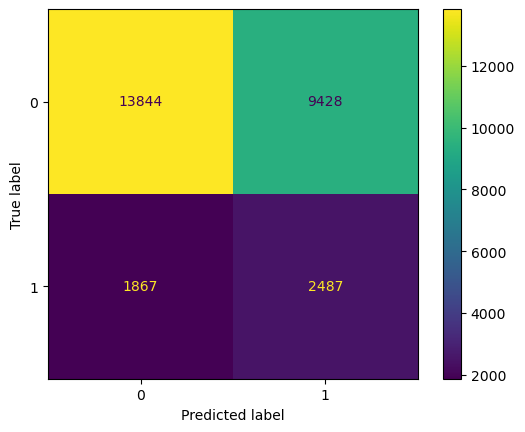

              precision    recall  f1-score   support

           0       0.88      0.59      0.71     23272
           1       0.21      0.57      0.31      4354

    accuracy                           0.59     27626
   macro avg       0.54      0.58      0.51     27626
weighted avg       0.78      0.59      0.65     27626



In [10]:
dt_y_pred = dt_model.predict(scaled_X_test)
dt_y_pred

matrix = confusion_matrix(y_test, dt_y_pred)

confusion_display = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                          display_labels=dt_model.classes_)
confusion_display.plot()

plt.show()

print(classification_report(y_test,dt_y_pred))

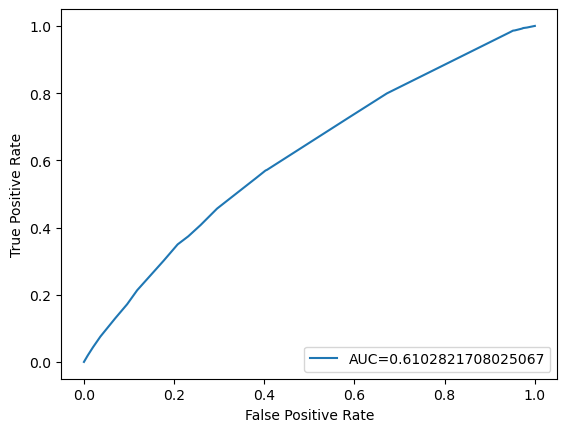

In [11]:
dty_pred_proba = dt_model.predict_proba(scaled_X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  dty_pred_proba)
auc = roc_auc_score(y_test, dty_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Create RF Model and Fit

In [12]:
rf_model = RandomForestClassifier(max_depth=None, max_leaf_nodes=None, random_state=42)
rf_model.fit(scaled_X_train, y_train_resampled)

RandomForestClassifier(random_state=42)

## Evaluate RF Model

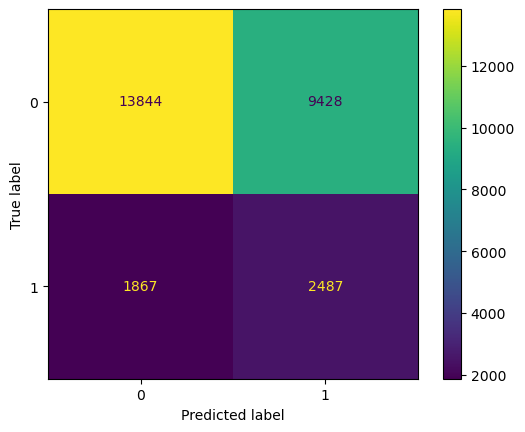

              precision    recall  f1-score   support

           0       0.88      0.59      0.71     23272
           1       0.21      0.57      0.31      4354

    accuracy                           0.59     27626
   macro avg       0.54      0.58      0.51     27626
weighted avg       0.78      0.59      0.65     27626



In [13]:
rf_y_pred = rf_model.predict(scaled_X_test)
rf_y_pred

matrix = confusion_matrix(y_test, rf_y_pred)

confusion_display = ConfusionMatrixDisplay(confusion_matrix=matrix,
                                          display_labels=rf_model.classes_)
confusion_display.plot()

plt.show()

print(classification_report(y_test,rf_y_pred))

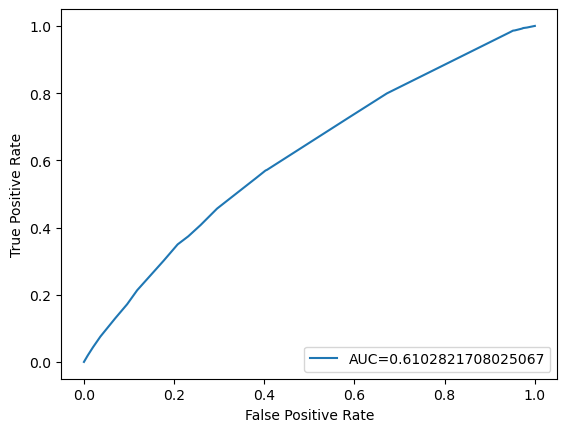

In [14]:
dty_pred_proba = dt_model.predict_proba(scaled_X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  dty_pred_proba)
auc = roc_auc_score(y_test, dty_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()